In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#el dataset utiliza el punto como separador de mil en lugar de decimal así que lo edito y me lo quito de encima
fin = open("data/50376.csv", "rt")
fout = open("data/out.csv", "wt")
for line in fin:
    fout.write(line.replace('.', ''))
fin.close()
fout.close()

In [4]:
#originalmente utilizé un converter para quitar el punto,pero solo funciona si el valor es <=999.999, aquí siempre se cumple
#pero para hacerlo más genérico prefiero mi método actual, dejo comentado el método anterior para que se vea que funciona

#def convertir_indicador_mil(x):
#    x=float(x)
#    if x.is_integer()==False:
#        return(int(x*1000))
#    else:
#        return(int(x))
#for i in range(len(nombres)):
#    tipo_dato=np.genfromtxt("data/50376.csv", delimiter=";",usecols=i,encoding=None,dtype=None,skip_header=1,
#                            converters={2: convertir_indicador_mil})
#    dtipos.append(tuple([nombres[i],tipo_dato.dtype.str]))
#data=np.loadtxt("data/50376.csv", delimiter=";",dtype=dtipos,skiprows=1,converters={2: convertir_indicador_mil})

#Primero cargo todo el dataset en formato de string y guardo los nombres de las columnas.Mi intención es guardarlo como
#un structured array. Luego dejo que genfromtxt encuentre el mejor formato de cada columna y lo guardo en una tupla
#con el nombre de la columna. Por último, cargo el dataset como un structured array

nombres=np.loadtxt("data/out.csv", delimiter=";",dtype=str)[0]
dtipos=[]
for i in range(len(nombres)):
    tipo_dato=np.genfromtxt("data/out.csv", delimiter=";",usecols=i,encoding=None,dtype=None,skip_header=1)
    dtipos.append(tuple([nombres[i],tipo_dato.dtype.str]))
data=np.loadtxt("data/out.csv", delimiter=";",dtype=dtipos,skiprows=1)

In [5]:
#encuentro los indices para cada fenomeno que hay
idx_nacidos=np.asarray(np.where(data[nombres[1]]==data[nombres[1]][0]))
idx_muertes=np.asarray(np.where(data[nombres[1]]==data[nombres[1]][1]))
idx_matrimonios=np.asarray(np.where(data[nombres[1]]==data[nombres[1]][2]))
idx_fallecidos=np.asarray(np.where(data[nombres[1]]==data[nombres[1]][3]))
idx_crecimiento=np.asarray(np.where(data[nombres[1]]==data[nombres[1]][4]))
indices=[idx_nacidos,idx_muertes,idx_matrimonios,idx_fallecidos,idx_crecimiento]

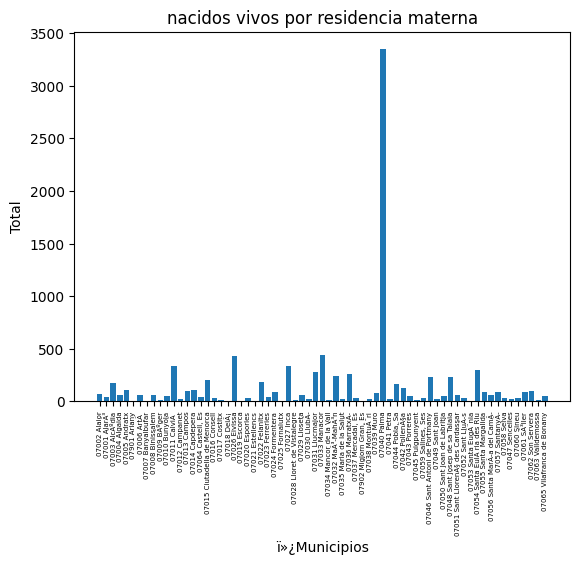

In [9]:
#representacion de la serie por nacidos vivos por residencia materna
nacidos=data[nombres[0]][idx_nacidos]
plt.bar(range(len(nacidos[0])),data[nombres[2]][idx_nacidos][0])
plt.xticks(range(len(nacidos[0])),nacidos[0],fontsize=5,rotation=90)
plt.title(data[nombres[1]][0])
plt.xlabel(nombres[0])
plt.ylabel(nombres[2])
plt.show()

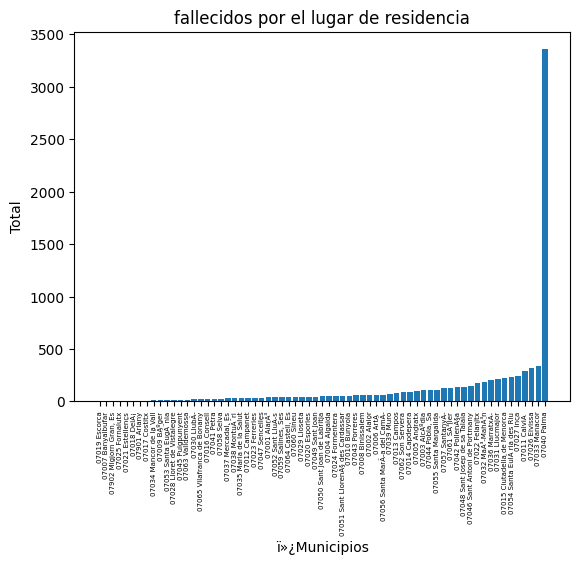

In [14]:
#representacion de la serie ordenada por fallecidos por el luegar de residencia
fallecidos_ordenados=data[nombres[0]][idx_fallecidos]
orden_ascendiente=np.argsort(data[nombres[2]][idx_fallecidos])
fallecidos_ordenados=fallecidos_ordenados[0][orden_ascendiente]
plt.bar(range(len(fallecidos_ordenados[0])),data[nombres[2]][idx_fallecidos][0][orden_ascendiente][0])
plt.xticks(range(len(fallecidos_ordenados[0])),fallecidos_ordenados[0],fontsize=5,rotation=90)
plt.title(data[nombres[1]][3])
plt.xlabel(nombres[0])
plt.ylabel(nombres[2])
plt.show()

In [8]:
#Media y desviacion estandar de cada fenomeno
contador=0
for n in indices:
    media=np.mean(data[nombres[2]][n])
    std=np.std(data[nombres[2]][n])
    print('La media de %s es' %data[nombres[1]][contador], media)
    print('La desviacion estandar de %s es' %data[nombres[1]][contador], std)
    contador+=1

La media de nacidos vivos por residencia materna es 141.11940298507463
La desviacion estandar de nacidos vivos por residencia materna es 408.24888232796377
La media de muertes fetales tardÃ­as por residencia materna es 0.5970149253731343
La desviacion estandar de muertes fetales tardÃ­as por residencia materna es 2.0447216465126816
La media de matrimonios por el lugar en que han fijado residencia es 44.17910447761194
La desviacion estandar de matrimonios por el lugar en que han fijado residencia es 135.04061582200407
La media de fallecidos por el lugar de residencia es 127.74626865671642
La desviacion estandar de fallecidos por el lugar de residencia es 405.29334661999485
La media de crecimiento vegetativo es 13.373134328358208
La desviacion estandar de crecimiento vegetativo es 32.63174711882176
